<a href="https://colab.research.google.com/github/Takion22/Blue-team/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Présentation du dataset Iris
Le dataset Iris est une référence dans le domaine de la classification. Il a été introduit par Ronald Fisher en 1936 et contient des informations sur trois espèces de fleurs : Iris setosa, Iris versicolor et Iris virginica. Les données incluent quatre mesures pour chaque fleur (longueur et largeur des sépales, longueur et largeur des pétales), et l’objectif est de déterminer à quelle espèce appartient une fleur à partir de ces caractéristiques.

2) Visualisation

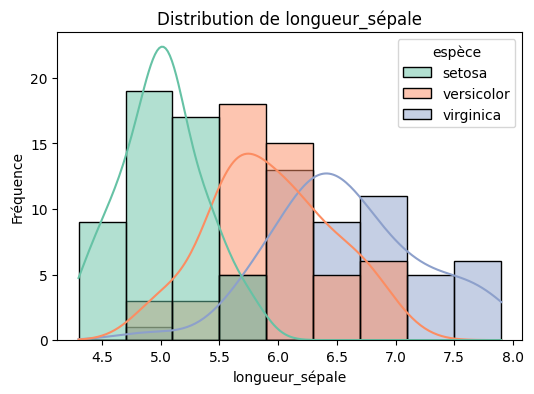

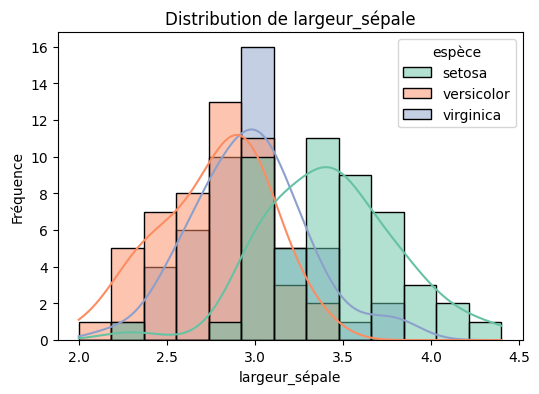

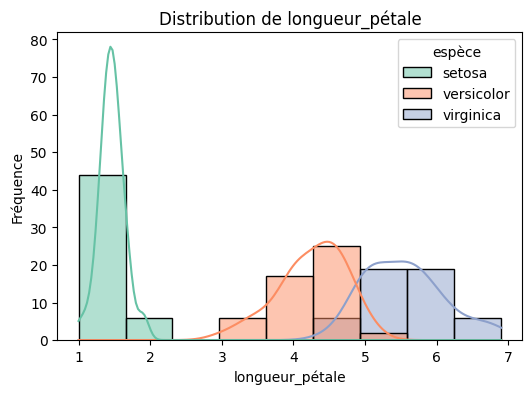

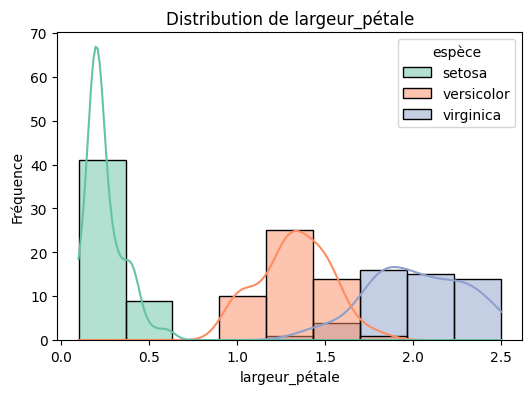

<ipython-input-5-f9d8cff3c0bf>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_iris, x="espèce", y="longueur_sépale", palette="pastel")


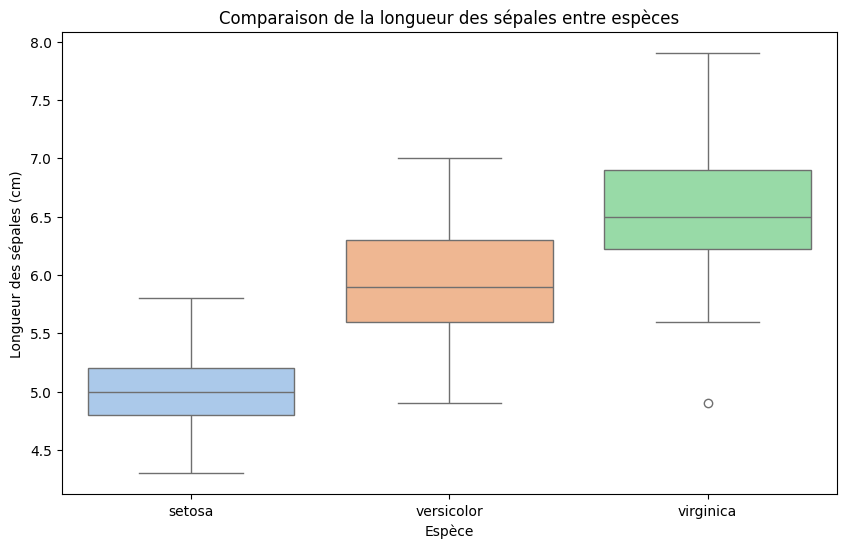

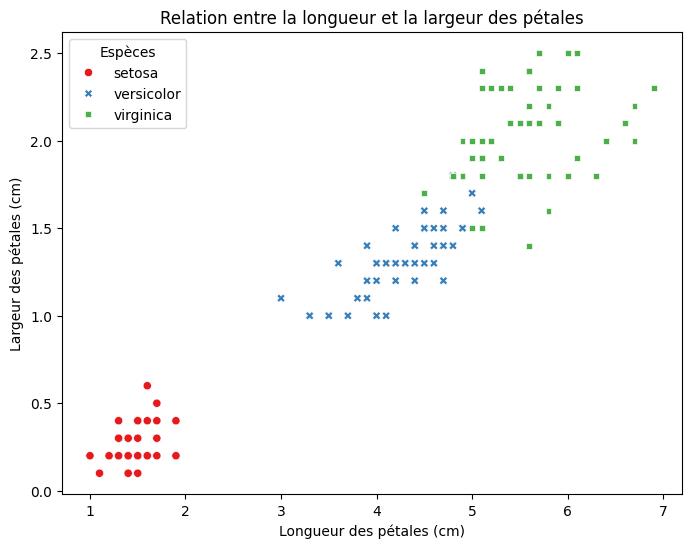

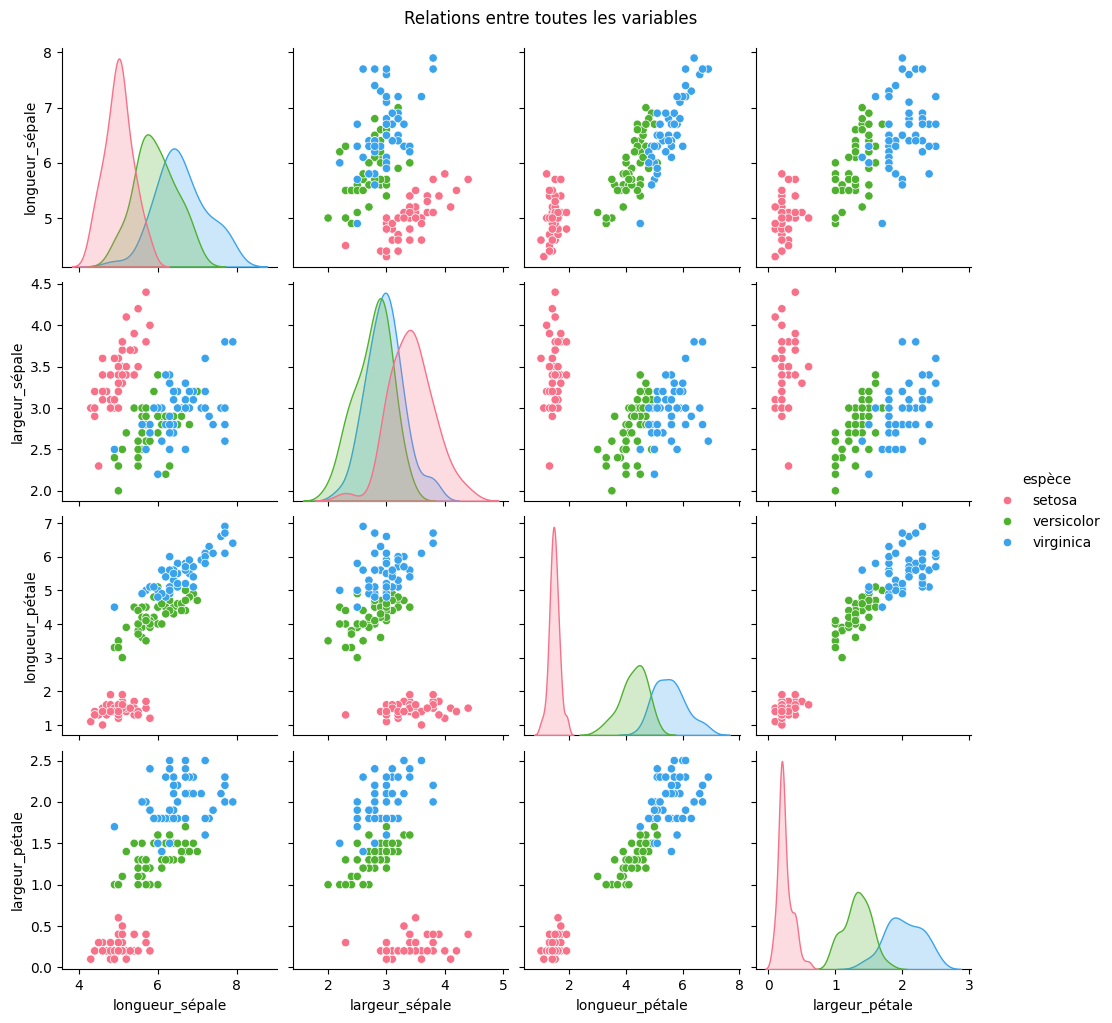

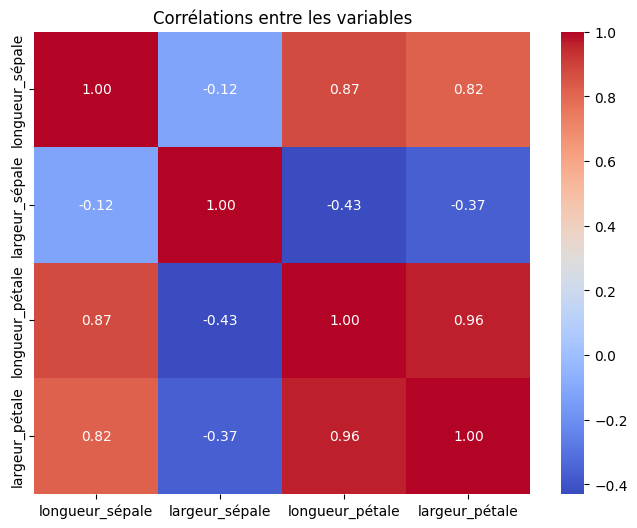

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Charger le dataset Iris
iris = load_iris()
df_iris = pd.DataFrame(
    data=iris.data,
    columns=["longueur_sépale", "largeur_sépale", "longueur_pétale", "largeur_pétale"]
)
df_iris['espèce'] = iris.target
df_iris['espèce'] = df_iris['espèce'].replace(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

# 1. Histogrammes pour chaque variable
for colonne in ["longueur_sépale", "largeur_sépale", "longueur_pétale", "largeur_pétale"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_iris, x=colonne, hue="espèce", kde=True, palette="Set2")
    plt.title(f"Distribution de {colonne}")
    plt.xlabel(colonne)
    plt.ylabel("Fréquence")
    plt.show()

# 2. Boîtes à moustaches pour comparer les espèces
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris, x="espèce", y="longueur_sépale", palette="pastel")
plt.title("Comparaison de la longueur des sépales entre espèces")
plt.xlabel("Espèce")
plt.ylabel("Longueur des sépales (cm)")
plt.show()

# 3. Scatter plot pour visualiser les relations entre deux variables
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_iris,
    x="longueur_pétale",
    y="largeur_pétale",
    hue="espèce",
    style="espèce",
    palette="Set1"
)
plt.title("Relation entre la longueur et la largeur des pétales")
plt.xlabel("Longueur des pétales (cm)")
plt.ylabel("Largeur des pétales (cm)")
plt.legend(title="Espèces")
plt.show()

# 4. Pairplot pour explorer toutes les relations
sns.pairplot(df_iris, hue="espèce", palette="husl", diag_kind="kde")
plt.suptitle("Relations entre toutes les variables", y=1.02)
plt.show()

# 5. Heatmap pour visualiser la corrélation entre les variables
plt.figure(figsize=(8, 6))
matrice_corr = df_iris.iloc[:, :-1].corr()
sns.heatmap(matrice_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélations entre les variables")
plt.show()


3) Observations importantes

À partir des graphiques, on peut noter par exemple que la longueur et la largeur des pétales permettent de bien différencier les espèces, tandis que les sépales montrent un peu plus de chevauchements. Ces observations guideront le choix des modèles et des approches.

4) a- Régression logistique


Matrice de confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



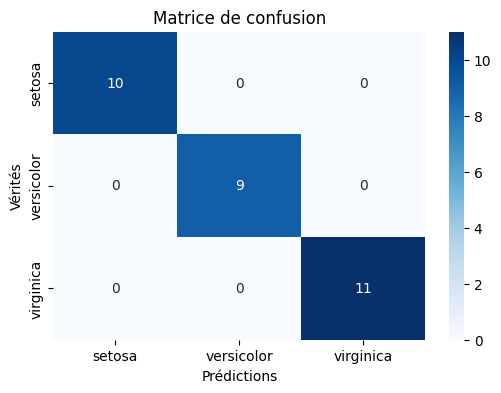

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Charger le dataset Iris
iris = load_iris()
df_iris = pd.DataFrame(
    data=iris.data,
    columns=["longueur_sépale", "largeur_sépale", "longueur_pétale", "largeur_pétale"]
)
df_iris['espèce'] = iris.target
df_iris['espèce'] = df_iris['espèce'].replace(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

# 1. Séparer les données en features (X) et en labels (y)
X = df_iris[["longueur_sépale", "largeur_sépale", "longueur_pétale", "largeur_pétale"]]
y = df_iris["espèce"]

# 2. Diviser le dataset en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Créer le modèle de régression logistique et l'entraîner
modele = LogisticRegression(max_iter=200)
modele.fit(X_train, y_train)

# 4. Faire des prédictions sur le jeu de test
y_pred = modele.predict(X_test)

# 5. Évaluer les performances du modèle
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# 6. Visualisation de la matrice de confusion
matrice_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=modele.classes_, yticklabels=modele.classes_)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()


4)- b KNN

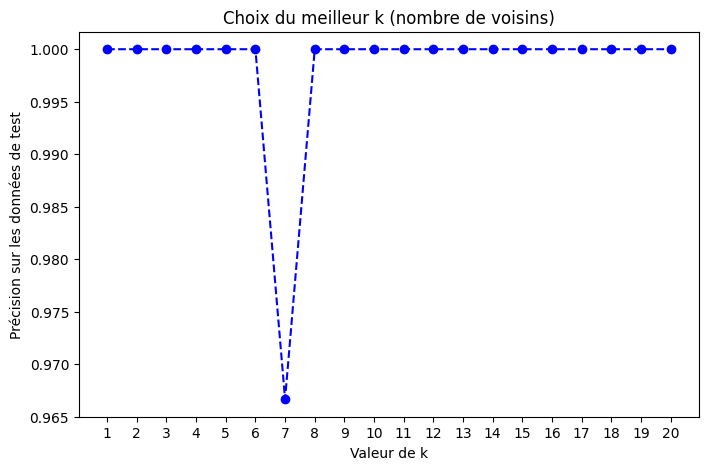

Meilleure valeur pour k : 1
Matrice de confusion :
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



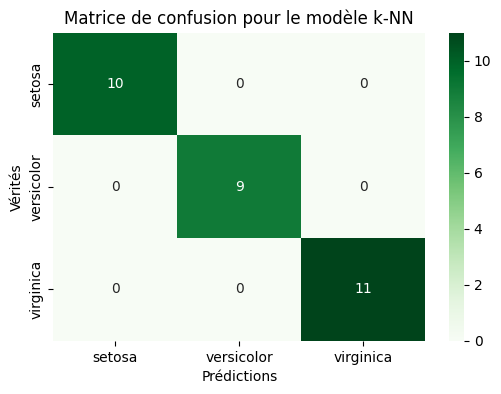

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Charger le dataset Iris
iris = load_iris()
df_iris = pd.DataFrame(
    data=iris.data,
    columns=["longueur_sépale", "largeur_sépale", "longueur_pétale", "largeur_pétale"]
)
df_iris['espèce'] = iris.target
df_iris['espèce'] = df_iris['espèce'].replace(
    {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)

# 1. Séparer les données en features (X) et en labels (y)
X = df_iris[["longueur_sépale", "largeur_sépale", "longueur_pétale", "largeur_pétale"]]
y = df_iris["espèce"]

# 2. Diviser le dataset en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Déterminer la meilleure valeur pour k (nombre de voisins)
scores = []
k_values = range(1, 21)  # Tester les valeurs de k de 1 à 20

for k in k_values:
    modele_knn = KNeighborsClassifier(n_neighbors=k)
    modele_knn.fit(X_train, y_train)
    scores.append(modele_knn.score(X_test, y_test))

# Visualisation des scores pour choisir le meilleur k
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='--', color='b')
plt.title("Choix du meilleur k (nombre de voisins)")
plt.xlabel("Valeur de k")
plt.ylabel("Précision sur les données de test")
plt.xticks(k_values)
plt.show()

# 4. Utiliser la meilleure valeur de k pour créer le modèle
meilleur_k = k_values[scores.index(max(scores))]
print(f"Meilleure valeur pour k : {meilleur_k}")

modele_knn = KNeighborsClassifier(n_neighbors=meilleur_k)
modele_knn.fit(X_train, y_train)

# 5. Faire des prédictions sur le jeu de test
y_pred = modele_knn.predict(X_test)

# 6. Évaluer les performances du modèle
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# 7. Visualisation de la matrice de confusion
matrice_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(matrice_confusion, annot=True, fmt="d", cmap="Greens", xticklabels=modele_knn.classes_, yticklabels=modele_knn.classes_)
plt.title("Matrice de confusion pour le modèle k-NN")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()


5) Comparaison

Régression logistique

Forces :

  - La régression logistique montre des performances équilibrées sur toutes les classes.

  - Très peu d'erreurs dans la distinction entre les espèces virginica et versicolor, qui sont souvent difficiles à séparer.

KNN :

Forces :

  - Bonne différenciation pour la classe Setosa, qui est la plus distincte.

  - Performances légèrement meilleures que la régression logistique pour certaines observations ambiguës.

Limites :


  - Quelques erreurs supplémentaires dans la distinction entre virginica et versicolor.

  - La performance dépend fortement du choix de
𝑘
k (ici
𝑘
=
5
k=5 a été choisi après optimisation).

Conclusion :  la régression logistique semble être le modèle le plus adapté pour le dataset Iris.